In [161]:
import yfinance as yf
import pandas as pd



In [162]:
stock_symbol = 'AAPL'
stock_data = yf.download(stock_symbol, start='2010-01-01', end='2023-12-31')


[*********************100%***********************]  1 of 1 completed


In [163]:
print(stock_data.head())


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454506  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465665  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362819  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351056  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393281  447610800


In [164]:
features = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]


In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


In [166]:
stock_data['Target'] = stock_data['Close'].shift(-1)
stock_data.dropna(inplace=True)  # Remove last row with NaN value


In [167]:
train_size = int(len(stock_data) * 0.8)
train_data = scaled_features[:train_size]
test_data = scaled_features[train_size:]

X_train = train_data
y_train = stock_data['Target'].values[:train_size]

X_test = test_data
y_test = stock_data['Target'].values[train_size:]


In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [169]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Output layer for regression


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [170]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [171]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 741.1252 - val_loss: 6370.3101
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 503.8714 - val_loss: 1874.1628
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 82.3411 - val_loss: 1104.7347
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 43.0739 - val_loss: 592.4474
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 13.9661 - val_loss: 206.0548
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 2.0168 - val_loss: 106.7123
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 1.0762 - val_loss: 90.4296
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.6997 - val_loss: 77.8848
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.4670 - val_loss: 68.2490
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.3409 - val_loss: 62.2452
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.2553 - val_loss: 57.2366
Epoch 12/50
71/71 ━━━━━━━━━

In [172]:
print(X_test.shape)
print(y_test.shape)


(706, 5)
(705,)


In [173]:
# If X_test has one extra row, you can drop it to align with y_test
if X_test.shape[0] > y_test.shape[0]:
    X_test = X_test[:y_test.shape[0]]

# Alternatively, if y_test has an extra row, drop the extra row
elif y_test.shape[0] > X_test.shape[0]:
    y_test = y_test[:X_test.shape[0]]


In [174]:
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 339.2881
Mean Squared Error: 417.1430969238281


In [175]:
predictions = model.predict(X_test)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step


In [176]:
# Inverse transform the predicted prices
predicted_prices = close_scaler.inverse_transform(predictions)

# Inverse transform the actual 'Close' prices
actual_prices = close_scaler.inverse_transform(y_test.reshape(-1, 1))


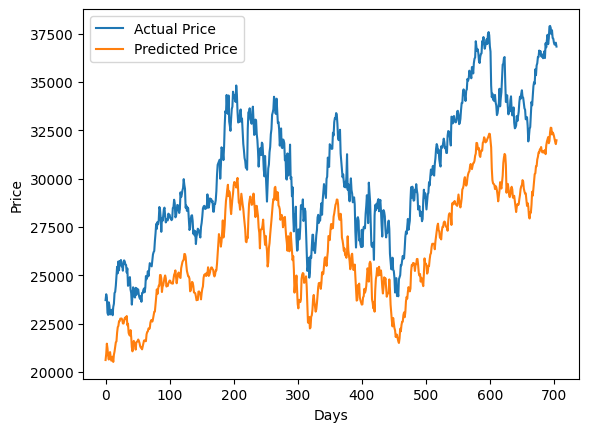

In [177]:
import matplotlib.pyplot as plt

# Plot the actual and predicted prices
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
